# Aprendizado Supervisionado

## Árvore de Decisão

Nas duas primeiras partes do curso apresentamos dois algoritmos clássicos de aprendizagem de máquian: o KNN e o algoritmo de regressão linear. O primeiro é voltado para o problema de classificação e o segundo para o de regressão. 

Neste tutorial, vamos explorar mais uma técnica para o problema de classificação. Para isso, vamos trabalhar com um outro método de classificação: as árvores de decisão. 

Nas árvores de decisão, o problema de aprendizado de máquina é visto com um problema de busca em um espaço de possíveis soluções. Este método faz uso da estratégia dividir para conquistar. A idéia básica é dividir um problema maior em problemas mais simples, aos quais são aplicadas, recursivamente, a mesma estratégia anterior. As soluções dos subproblemas podem ser combinadas, na forma de uma árvore, para produzir uma solução do problema complexo. A força dessa proposta vem da capacidade de dividir o espaço de instâncias em subespaços e cada subespaço é ajustado usando diferentes modelos. Essa é a idéia básica por trás dos principais algoritmos de ávore de decisão, tais como: ID3, ASSITANT, CART, C4.5.

A imagem a seguir mostra um exemplo de árvore de decisão e as regiões de decisão dentro do espaço de soluções definidos pelos atributos $x_1$ e $x_2$.

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/print_arvores_decisao.png" width="70%">

Cada nó da árvore corresponde a uma região no espaço de decisão que foi definido pelos atributos. É importante ressaltar que as regiões nesse espaço são mutuamente excludentes, e a reunião delas compõe todo o espaço definido pelos atributos. A árvore de decisão consegue abranger todo o espaço de instâncias. Isso implica que uma árvore de decisão é capaz de fazer predição para qualquer exemplo de entrada.

## Algoritmo para construção da árvore de decisão

O algoritmo para a construção da árvore de decisão consiste em escolher os atributos que melhor separam os dados. O ideal é que o primeiro atributo seja aquele que quando selecionado já consiga classificar o maior número de instâncias possível. Para isto, vamos calcular, para cada atributo, o que chamamos de **ganho de informação (GI)**. O GI mede a efetividade de um atributo em classificar um conjunto de treinamento. Em outras palavras, permite avaliar o quão bom um atributo é para classificar um conjunto de treinamento.

O Ganho de Informação é dado pela seguinte equação: 

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$, 

onde E é a entropia dada por: 

$E = \sum_{i}^{c}{-p_i\log_2{p_i}}$

A entropia mede o nível de certeza que temos sobre um determinado evento. $S$ é o conjunto de dados que estamos considerando na análise do GI do atributo $A$.

Para ilustrar, considere um evento qualquer que possui 14 exemplos ($S$). Destes exemplos, 9 são positivos e 5 são negativos. A entropia desse conjunto é dada por:

$E(S) = -\frac{9}{14}\log_2{\frac{9}{14}} - \frac{5}{14}\log_2{\frac{5}{14}} = 0.94$

E se tivéssemos 7 instâncias positivas e 7 negativas ([7+, 7-]):

$E(S) = -\frac{7}{14}\log_2{\frac{7}{14}} - \frac{7}{14}\log_2{\frac{7}{14}} = 0.999... \approx 1$

E para [0+,14-] ou [14+, 0-]:

$E(S) = -\frac{14}{14}\log_2{\frac{14}{14}} = 0$

O cálculo do GI está relacionado com a Entropia. Na verdade, GI é a redução da entropia, causada pelo particionamento de exemplos de acordo com este atributo. Quanto maior a **redução da entropia** melhor o atributo. 

### Exemplo 1

Dado um conjunto de treinamento $S$ contendo o atributo **Vento** (que pode receber dois valores: Forte ou Fraco). Considere também que $S$ possui 9 instâncias positivas e 5 instâncias negativas (classe para classificação). Considere também que 6 dos exemplos positivos e 2 exemplos dos negativos são associados a vento Fraco. Além disso, 3 exemplos negativos e 3 exemplos positivos estão associados a vento Forte. 

Pretende-se calcular o ganho de informação ao selecionar o valor atributo Vento para a raiz de uma árvore de decisão.

**Cálculo**

O conjunto S está dividido da seguinte forma: $S = [9+, 5-]$ e a divisão de acordo com o atributo é dada por:

$S_{fraco} \leftarrow [6+, 2-]$

$S_{forte} \leftarrow [3+, 3-]$

Sabendo que o cálculo do GI é dado por: 

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$, 

onde S é o conjunto de treinamento que vai ser dividido e A é o atributo a ser considerado. 

O primeiro passo é calcular E(S).

$E(S) = -\frac{9}{14}\log_2{\frac{9}{14}} - \frac{5}{14}\log_2{\frac{5}{14}} = 0.940$

Agora vamos trabalhar com os atributos: 

O atributo Vento possui dois valores: Forte e Fraco. Devemos calcular a entropia para cada um desses atributos: 

$E(S_{fraco}) = -\frac{2}{8}\log_2{\frac{2}{8}} - \frac{6}{8}\log_2{\frac{6}{8}} = 0.811$

$E(S_{forte}) = -\frac{3}{6}\log_2{\frac{3}{6}} - \frac{3}{6}\log_2{\frac{3}{6}} = 1$

Com isso podemos calcular: 

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$- \frac{8}{14}*0.811 - \frac{6}{14}*1 = -0.892$

Por fim, temos que  o Ganho de Informação é: 

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = 0.940 - 0.892 = 0.048$

Essa valor significa que selecionar esse atributo reduz muito pouco o nível de incerteza que tínhamos. Sendo assim, ele não é um atributo muito bom para ser selecionado.

## Construindo uma árvore de decisão

Exemplo retirado de: http://conteudo.icmc.usp.br/pessoas/mello/courses/scc5879-aula05.pdf

Vamos considerar o seguinte dataset:

In [3]:
from sklearn import tree
import pandas as pd

data = pd.read_csv('https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/exemplo_jogar.csv')

data

,Panorama,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Intermediária,Alta,Fraco,Sim
4,Chuvoso,Fria,Normal,Fraco,Sim
5,Chuvoso,Fria,Normal,Forte,Não
6,Nublado,Fria,Normal,Forte,Sim
7,Ensolarado,Intermediária,Alta,Fraco,Não
8,Ensolarado,Fria,Normal,Fraco,Sim
9,Chuvoso,Intermediária,Normal,Fraco,Sim


O dataset possui 4 atributos: (1) Panorama, (2) Temperatura, (3) Umidade e (4) Vento. A classe é o atributo *Jogar*. A tarefa de classificação consiste em dado um panorama sobre o clima, devemos jogar ou não jogar tênis. Para construir uma árvore de decisão o primeiro passo é escolher qual atributo será colocado na raiz da árvore. Dentre os atribuitos, o ideal é que seja escolhido sempre aquele que possui o maior ganho de informação. Vamos calcular GI para cada um dos atributos.

### Atributo Vento [Forte, Fraco]

O GI de informação do atributo vento já foi calculado no exemplo anterior. O valor dele é **0.048**. Já sabemos que ele não é um bom atributo, mas só descartamos a escolha deste quando fizermos a comparação de seu valor com o GI dos demais atributos.

### Atributo Panorama [Ensolarado, Nublado, Chuvoso]

O atributo panorama está dividido da seguinte forma na base de treinamento: 

* Ensolarado: $\frac{5}{14}$ onde $[2+, 3-]$ 


* Nublado: $\frac{4}{14}$ onde $[4+, 0-]$


* Chuvoso: $\frac{5}{14}$ onde $[3+, 2-]$ 

Vamos calcular a entropia e o ganho de informação de cada atributo:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{5}{14}*E(S_{Ensolarado}) - \frac{4}{14}*E(S_{Nublado}) - 
\frac{5}{14}*E(S_{Chuvoso})$

Calculando a entropia de cada atributo temos:

$E(S_{Ensolarado}) = - \frac{2}{5}*log_2{\frac{2}{5}} - \frac{3}{5}*log_2{\frac{3}{5}} = 0.971$

$E(S_{Nublado}) = - \frac{4}{4}*log_2{\frac{4}{4}} - \frac{0}{4}*log_2{\frac{0}{4}} = 0$

$E(S_{Chuvoso}) = - \frac{3}{5}*log_2{\frac{3}{5}} - \frac{2}{5}*log_2{\frac{2}{5}} = 0.971$

Calculando o ganho de informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{5}{14}*E(S_{Ensolarado}) - \frac{4}{14}*E(S_{Nublado}) - 
\frac{5}{14}*E(S_{Chuvoso})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{5}{14}*0.971 - \frac{4}{14}*0 - \frac{5}{14}*0.971 = -0.693$

Por fim, temos que o GI de informação para o atributo **Panorama** é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.940 - 0.693 = 0.247$

**Até o momento, temos: **

$GI(Vento) = 0.048$

$GI(Panorama) = 0.247$

E o atributo **temperatura**?

E o atributo **umidade**?

### O Atributo Umidade [Alta, Normal]

O atributo umidade está dividido da seguinte forma na base de treinamento: 

* Alta: $\frac{7}{14}$ onde $[3+, 4-]$ 


* Normal: $\frac{7}{14}$ onde $[6+, 1-]$

Vamos calcular:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{7}{14}*E(S_{Alta}) - \frac{7}{14}*E(S_{Normal})$

Calculando a entropia de cada atributo temos:

$E(S_{Alta}) = - \frac{3}{7}*log_2{\frac{3}{7}} - \frac{4}{7}*log_2{\frac{4}{7}} = 0.985$

$E(S_{Normal}) = - \frac{6}{7}*log_2{\frac{6}{7}} - \frac{1}{7}*log_2{\frac{1}{7}} = 0.591$


Agora podemos calcular o ganho de informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{7}{14}*E(S_{Alta}) - \frac{7}{14}*E(S_{Normal})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{7}{14}*0.985 - \frac{7}{14}*0.591 = -0.788$

Por fim, temos que o GI de informação para o atributo Umidade é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.940 - 0.788 = 0.152$

### Atributo Temperatura [Quente, Intermediária, Fria]

O atributo Temperatura está dividido da seguinte forma na base de treinamento: 

* Quente: $\frac{4}{14}$ onde $[2+, 2-]$ 


* Intermediária: $\frac{6}{14}$ onde $[4+, 2-]$


* Fria: $\frac{4}{14}$ onde $[3+, 1-]$ 

Vamos calcular:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{4}{14}*E(S_{Quente}) - \frac{6}{14}*E(S_{Intermediaria}) - 
\frac{4}{14}*E(S_{Fria})$

Calculando a entropia de cada atributo temos:

$E(S_{Quente}) = - \frac{2}{4}*log_2{\frac{2}{4}} - \frac{2}{4}*log_2{\frac{2}{4}} = 1$

$E(S_{Intermediaria}) = - \frac{4}{6}*log_2{\frac{4}{6}} - \frac{2}{6}*log_2{\frac{2}{6}} = 0.918$

$E(S_{Fria}) = - \frac{3}{4}*log_2{\frac{3}{4}} - \frac{1}{4}*log_2{\frac{1}{4}} = 0.811$

Agora podemos calcular o ganho de informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{4}{14}*E(S_{Quente}) - \frac{6}{14}*E(S_{Intermediaria}) - 
\frac{4}{14}*E(S_{Fria})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{4}{14}*1 - \frac{6}{14}*0.918 - \frac{4}{14}*0.811 = -0.910$

Por fim, temos que o GI de informação para o atributo Temperatura é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.940 - 0.910 = 0.030$

Dessa forma, já temos a análise dos 4 atributos: 

$GI(S, Panorama) = 0.247$

$GI(S, Umidade) = 0.152$

$GI(S, Vento) = 0.048$

$GI(S, Temperatura) = 0.03$

Dos 4 atributos, devemos selecionar aquele que proporciona um maior ganho de informação. Neste caso, escolhemos o atributo **Panorama**. Ele é que deve ser a raiz da árvore. 

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/arvoredecisao_01.png">

Observe que com a escolha desse atributo já conseguimos classificar um conjunto de dados da base de treinamento. Se o panorama for Nublado, sempre jogará tênis. No entanto, ainda não temos certeza quando o panorama for ensolarado ou chuvoso. Nestes casos, devemos analisar novamente os atributos do conjunto de treinamento para decidir qual atributo devemos escolher para o nó quando for ensolarado e quando for chuvoso. Para este cálculo, o atributo Panorama não entra na computação do Ganho de Informação.

O processo de cálculo é o mesmo. No entanto, seu conjunto *S* muda. *S* passa ser agora, no caso de ensolarado, $ S = {D1, D2, D8, D9, D11}$ que são divididos em $[2+, 3-]$. No caso de chuvoso, o conjunto *S* passa a ser $S = {D4, D5, D6, D10, D14}$ que são divididos em $[3+, 2-]$.

Vamos trabalhar com o caso *Ensolarado*.

O primeiro passo é calcular a entropia de S ($E(S)$):

$E = \sum_{i}^{c}{-p_i\log_2{p_i}} = -\frac{2}{5}*\log_2{\frac{2}{5}} - \frac{3}{5}*\log_2{\frac{3}{5}} = 0.971$

Com o valor da Entropia de $S$, calculamos o $GI$ para cada um dos atributos restantes: Umidade, Temperatura e Vento.

### O Atributo Umidade [Alta, Normal]

O atributo umidade está dividido da seguinte forma na base de treinamento: 

* Alta: $\frac{3}{5}$ onde $[0+, 3-]$ 


* Normal: $\frac{2}{5}$ onde $[2+, 0-]$


Vamos calcular:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*E(S_{Alta}) - \frac{2}{5}*E(S_{Normal})$

Calculando a entropia de cada atributo temos:

$E(S_{Alta}) = - \frac{0}{3}*log_2{\frac{0}{3}} - \frac{3}{3}*log_2{\frac{3}{3}} = 0$

$E(S_{Normal}) = - \frac{2}{2}*log_2{\frac{2}{2}} - \frac{0}{2}*log_2{\frac{0}{2}} = 0$


Agora podemos calcular o Ganho de Informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*E(S_{Alta}) - \frac{3}{5}*E(S_{Normal})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*0 - \frac{3}{5}*0 = 0$

Por fim, temos que o GI de informação para o atributo Umidade é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.971 - 0 = 0.971$

### Atributo Temperatura [Quente, Intermediária, Fria]

O atributo Temperatura está dividido da seguinte forma na base de treinamento: 

* Quente: $\frac{2}{5}$ onde $[0+, 2-]$ 


* Intermediária: $\frac{2}{5}$ onde $[1+, 1-]$


* Fria: $\frac{1}{5}$ onde $[1+, 0-]$ 

É fácil definir as entropiais individiuais:

$E_(S_{Quente}) = 0$

$E_(S_{Intermediaria}) = 1$

$E_(S_{Fria}) = 0$

Vamos calcular o Ganho de Informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{2}{5}*E(S_{Quente}) - \frac{2}{5}*E(S_{Intermediaria}) - 
\frac{1}{5}*E(S_{Fria})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{2}{5}*0 - \frac{2}{5}*1 - \frac{1}{5}*0 = -0.4$

Por fim, temos que o GI de informação para o atributo Temperatura é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.971 - 0.4 = 0.571$

### Atributo Vento [Fraco, Forte]

O atributo Vento está dividido da seguinte forma na base de treinamento: 

* Fraco: $\frac{3}{5}$ onde $[1+, 2-]$ 


* Forte: $\frac{2}{5}$ onde $[1+, 1-]$

É fácil definir as entropiais individiuais:

$E_(S_{Fraco}) = 0.918$

$E_(S_{Forte}) = 1$

Vamos calcular o Ganho de Informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*E(S_{Quente}) - \frac{2}{5}*E(S_{Intermediaria})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*0.918 - \frac{2}{5}*1 = -0.951$

Por fim, temos que o GI de informação para o atributo Vento é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.971 - 0.950 = 0.020$

Dessa forma, já temos a análise dos 3 atributos restantes: 

$GI(S, Umidade) = 0.971$

$GI(S, Vento) = 0.571$

$GI(S, Temperatura) = 0.020$

Dos 3 atributos, devemos selecionar aquele que proporciona um maior ganho de informação. Neste caso, escolhemos o atributo **Umidade**. Ele é que deve ser o atributo quando ensolarado. 

<img src="https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/arvoredecisao_02.png">

E no caso do ramo **Chuvoso**, como fica a separação? Essa tarefa será passada como atividade desta aula.

## Implementando a árvore de decisão no Scikit Learn

Apresentados os conceitos teóricos sobre como as árvores de decisão são formadas, vamos usar a biblioteca do Scikit Learn para construir um classificador baseado neste modelo. 

O primeiro passo é preparar a nossa base de dados. Vamos trabalhar no primeiro exemplo com a base do exemplo de Jogar Tênis. Essa base trabalha com valores dos atributos em texto. No entanto, o scikit learn trabalhar apenas com valores numéricos para os atributos e classes. O código a seguir faz esse processamento da base. 

Como foi dito anteriormente, a explicação dos métodos utilizados para processar estas bases fogem do escopo deste material. 

Para quem quiser mais detalhes do processo utilizado nesta etapa, visite [este link](http://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [4]:
from sklearn import preprocessing

#Ler a base de dados
data = pd.read_csv('https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/exemplo_jogar.csv')

# O pacote preprocessing possui o método LabelEncoder que faz a transformação automática dos atributos textuais em
# valores numéricos.
le_P = preprocessing.LabelEncoder() # Panorama
le_T = preprocessing.LabelEncoder() # Temperatura
le_U = preprocessing.LabelEncoder() # Umidade
le_V = preprocessing.LabelEncoder() # Vento
le_J = preprocessing.LabelEncoder() # Jogar

# Transforma os atributos de string em numéricos. Os números são atribuídos de acordo com a posição do label 
# na lista que está sendo impressa.
data.Panorama = le_P.fit_transform(data.Panorama)
print("Valores para o atributo Panorama: ", list(le_P.classes_))

data.Temperatura = le_T.fit_transform(data.Temperatura)
print("Valores para o atributo Temperatura: ", list(le_T.classes_))

data.Umidade = le_U.fit_transform(data.Umidade)
print("Valores para o atributo Umidade: ", list(le_U.classes_))

data.Vento = le_V.fit_transform(data.Vento)
print("Valores para o atributo Vento: ", list(le_V.classes_))

data.Jogar = le_J.fit_transform(data.Jogar)
print("Valores para o atributo Jogar: ", list(le_J.classes_))

data

Valores para o atributo Panorama:  ['Chuvoso', 'Ensolarado', 'Nublado']
Valores para o atributo Temperatura:  ['Fria', 'Intermediária', 'Quente']
Valores para o atributo Umidade:  ['Alta', 'Normal']
Valores para o atributo Vento:  ['Forte', 'Fraco']
Valores para o atributo Jogar:  ['Não', 'Sim']


,Panorama,Temperatura,Umidade,Vento,Jogar
0,1,2,0,1,0
1,1,2,0,0,0
2,2,2,0,1,1
3,0,1,0,1,1
4,0,0,1,1,1
5,0,0,1,0,0
6,2,0,1,0,1
7,1,1,0,1,0
8,1,0,1,1,1
9,0,1,1,1,1


In [5]:
# Criando X e Y

feature_columns = ['Panorama','Temperatura','Umidade','Vento']

X = data[feature_columns]
y = data.Jogar

Os algoritmos de aprendizagem baseados em árvores é implementado no pacote [**tree**](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) do scikit-learn. Vamos utilizar o [**DecisionTreeClassifier**](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

O atribuito ***criterion*** passado como parâmetro indica qual métrica será utilizada para avaliar a qualidade da divisão. O critério ganho de informação é identificado por **entropy**.

In [6]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_tree = clf_tree.fit(X,y)

Podemos gerar uma imagem que representa a árvore de decisão criada a partir da função a seguir.

In [7]:
from IPython.display import Image  
import pydotplus


def print_tree(classifier, fn, cn):
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=fn,  
                         class_names=cn,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return graph.create_png()

A árvore criada não é a mesma criada manualmente porque o scikit-learn trabalhar com dados numéricos. A árvore que criamos manualmente trabalhar com dados categóricos.

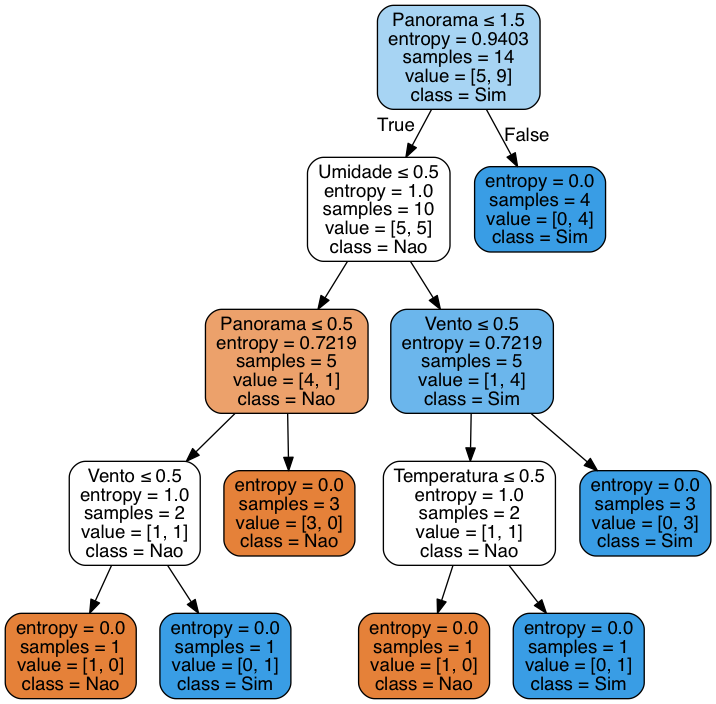

In [9]:
img_png = print_tree(clf_tree, feature_columns, ['Nao','Sim'])
Image(img_png, width=500)

## Aplicando a árvore de decisão na base da Iris

O exemplo anterior foi só para mostrar como podemos construir manualmente a árvore de decisão. Vamos trabalhar agora com uma base mais completa já vista anteriormente: a base Iris. O propósito é treinarmos o modelo e analisar a acurácia deste utilizando a validação cruzada. 

In [10]:
# Importando a base da Iris
from sklearn.datasets import load_iris

dataset_iris = load_iris()

X = dataset_iris.data
y = dataset_iris.target

Vamos fazer o treinamento usando validação cruzada com 5 folds. Em seguida vamos imprimir a acurácia na base de treino (a média dos 5 folds).

In [15]:
# Aplicando a validação cruzada na base
from sklearn.model_selection import cross_val_score

clf_tree = tree.DecisionTreeClassifier(criterion='entropy')

clf_tree = clf_tree.fit(X, y)

scores = cross_val_score(clf_tree, X, y, cv=5, scoring='accuracy')

print("Acurácia da Ávore de Decisão: ", scores.mean())

Acurácia da Ávore de Decisão:  0.96


Imprimindo a árvore treinada.

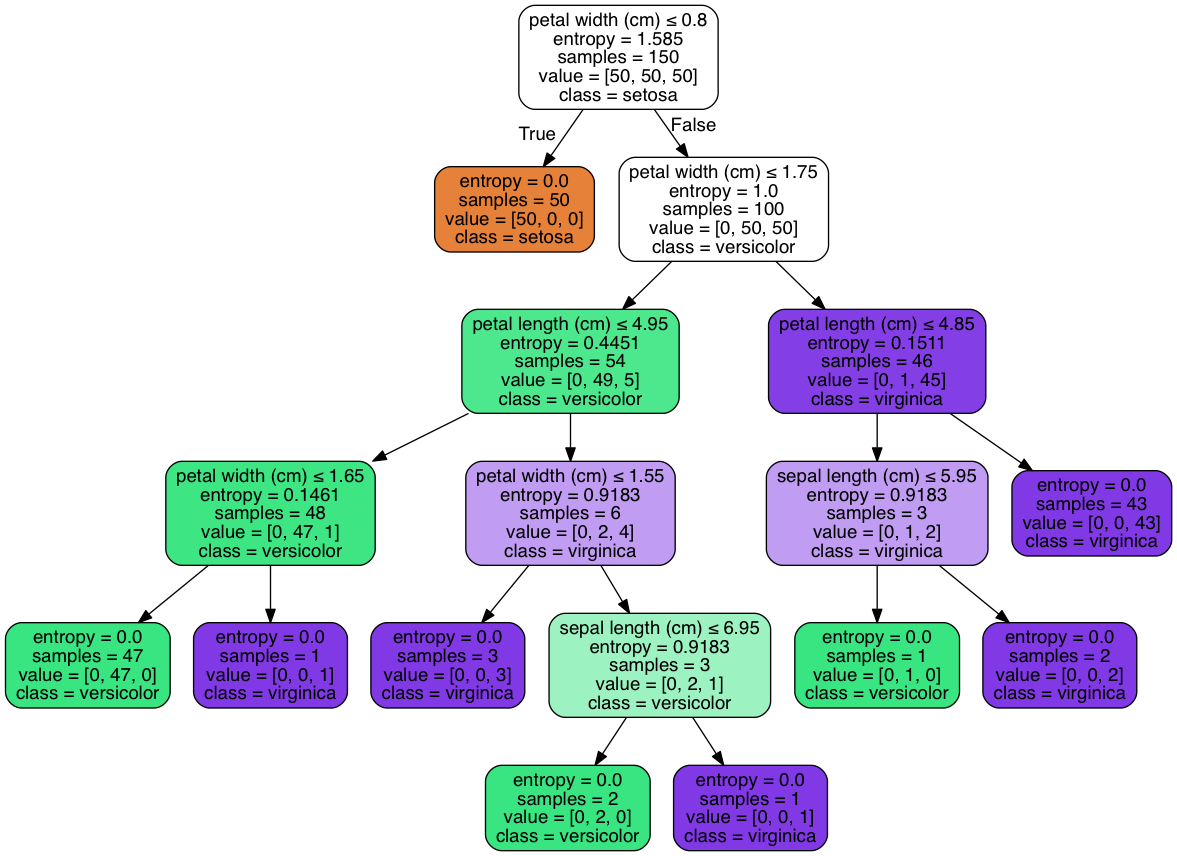

In [16]:
tree_png = print_tree(clf_tree, dataset_iris.feature_names, dataset_iris.target_names)
Image(tree_png, width=800)

Com isso fechamos esse tutorial de Árvore de Decisão. Nos execícios correspondentes vamos explorar um pouco mais como utilizar a árvore de decisão e compar o seu resultado com outros classificadores.

**Até o próximo tutorial ;)**